In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
get_attr = lambda x: lambda y: x.y
df = pd.read_csv('temperature_data_processed.csv')
df = df.astype({'stationid': np.int32, 'temp': np.float64, 'time': np.int32})
df['date']  = pd.to_datetime(df['date'], format="%Y%m%d")
df['year']  = df['date'].map(lambda x: x.year)
df['month'] = df['date'].map(lambda x: x.month)
df['day']   = df['date'].map(lambda x: x.day)
df = df[df['temp'] != -999.0]
df

,stationid,temp,date,time,year,month,day
0,3,-5.6,1891-01-01,7,1891,1,1
1,3,-0.7,1891-01-01,14,1891,1,1
2,3,-4.0,1891-01-01,21,1891,1,1
3,3,-5.2,1891-01-02,7,1891,1,2
4,3,-1.0,1891-01-02,14,1891,1,2
...,...,...,...,...,...,...,...
6972476,15526,7.4,1935-12-30,14,1935,12,30
6972477,15526,7.0,1935-12-30,20,1935,12,30
6972478,15526,7.0,1935-12-31,8,1935,12,31
6972479,15526,8.2,1935-12-31,14,1935,12,31


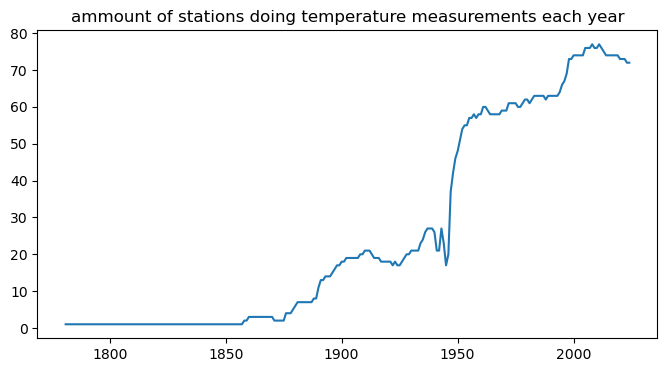

In [40]:
meas_per_year = df[['year','stationid']].groupby('year').nunique().reset_index()
fig, ax = plt.subplots(figsize=(8,4))
_ = ax.plot(meas_per_year['year'], meas_per_year['stationid'])
_ = ax.set_title('ammount of stations doing temperature measurements each year')

In [70]:
stations_1960 = set(df.loc[df['year'] == 1960])
stations_2020 = set(df.loc[df['year'] == 2020])
refrence_stations = df[list(stations_1960 & stations_2020)]
refrence_range = refrence_stations.loc[refrence_stations['year'].isin(range(1960, 2021))]
refrence = refrence_range.loc[refrence_range['time'].isin([12, 14])]
refrence

,stationid,year,day,temp,month,date,time
59167,3,1960,1,9.9,1,1960-01-01,14
59170,3,1960,2,8.2,1,1960-01-02,14
59173,3,1960,3,6.8,1,1960-01-03,14
59176,3,1960,4,9.6,1,1960-01-04,14
59179,3,1960,5,9.6,1,1960-01-05,14
...,...,...,...,...,...,...,...
6919631,15000,2020,27,3.8,12,2020-12-27,12
6919634,15000,2020,28,3.2,12,2020-12-28,12
6919637,15000,2020,29,3.6,12,2020-12-29,12
6919640,15000,2020,30,2.9,12,2020-12-30,12


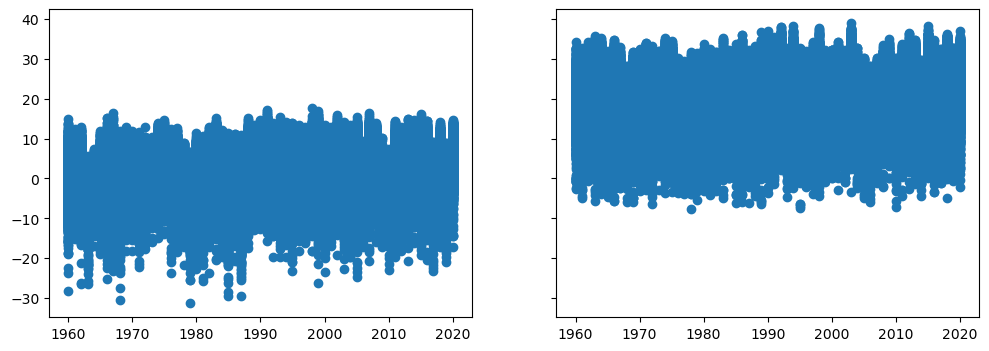

In [90]:
jan = refrence[refrence['month'] == 1]
aug = refrence[refrence['month'] == 8]
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True)
ax[0].scatter(jan['year'], jan['temp'])
ax[1].scatter(aug['year'], aug['temp'])